In [2]:
import pandas as pd
import numpy as np
import os

# Bank Marketing Dataset
## Abstract
### Este dataset es sobre campañas de afiliación a los servicios de un banco portugues

Estas campañas fueron basadas en llamadas telefónicas para lograr la suscripción del cliente

### Los insight que buscamos con este trabajo serán relacionados a efectividad de las campañas (si consiguieron un 'yes' o 'no')
Por eso identificamos que el valor más importante a destacar de este dataframe y con el cual vamos a querer trabajar mucho es el valor de la columna 'y' este nos dice si la camapaña consiguió la suscripción del cliente o no, el formato es de 'yes' y 'no' respectivamente. Hay otras columnas o valores que no son necesarios para el análisis de efectividad de la camapaña los cuales podemos ignorar y otras que no son imprescindibles pero nos podrán otorgar algún insight más también relacionado; como la educación de los posibles clientes, si tienen prestamos anteriores, casa, su estado marital, el tipo de trabajo que realizan.

### El objetivo final del análisis:
Se me ocurre que podria ser un modelo predictivo de la efectividad que tendrá una campaña adicional, cuantos clientes podria conseguir. Y eso podriamos discriminarlo en los distintos tipos de clientes. No se si será posible, pero se me ocurre que puede ser de utilidad un modelo predictivo segun el nivel de estudios alcanzado por el cliente y otro por el rubro en el cual se desempeña.


In [3]:
bank_df = pd.read_csv('bank-additional.csv',sep=';')

Luego de importar pandas, numpy y os nos traemos la data del csv que en este caso fué separada por ; en vez de , Pasamos a dar el 1er vistazo al DF

In [3]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### A continuación iniciaremos los 1ros análisis epxloratorios más básicos, como el shape, el describe y un sample

In [4]:
bank_df.shape

(4119, 21)

In [5]:
# como no se llegan a visualizar todas las columnas, pediremos a Python que nos las liste
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# le pediremos a python nos describa el dataframe con los indicadores básicos, el conteo, la media (promedio), el desvio estándard, el valor mínimo, los cuartiles y el valor máximo
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# veremos una muestra aleatoria de 10 rows de esta dataframe
bank_df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3053,41,blue-collar,married,basic.6y,no,yes,yes,telephone,may,tue,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
3206,34,blue-collar,married,basic.4y,unknown,no,yes,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2663,40,admin.,single,high.school,no,no,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
1276,55,blue-collar,married,professional.course,unknown,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1078,32,technician,single,university.degree,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
3295,30,admin.,married,university.degree,no,yes,yes,cellular,may,mon,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
432,58,entrepreneur,married,university.degree,no,no,no,telephone,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
1732,36,admin.,single,unknown,no,no,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
2803,32,technician,married,professional.course,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
3873,50,entrepreneur,married,basic.9y,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no


#### Vamos a crear un filtro de los casos que la campaña consiguió un Yes (una suscripcion al servicio del banco) y con ello sabremos cuantas campañas exitosas tuvieron y como se relacionan otros datos del DF con esos casos

In [8]:
bank_df_suby = bank_df[bank_df['y']=='yes']
bank_df_suby

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
21,39,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
25,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
53,24,technician,married,university.degree,no,yes,yes,cellular,sep,tue,...,2,3,1,success,-3.4,92.379,-29.8,0.770,5017.5,yes
59,60,admin.,divorced,professional.course,no,yes,no,cellular,sep,wed,...,1,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,74,retired,married,university.degree,no,yes,yes,cellular,aug,wed,...,3,999,0,nonexistent,-2.9,92.201,-31.4,0.854,5076.2,yes
4066,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
4069,60,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
4088,47,management,married,university.degree,no,yes,no,cellular,sep,mon,...,1,3,2,success,-3.4,92.379,-29.8,0.771,5017.5,yes


#### Ordenaré el DF por campañas asi tenemos de un rápido vistazo la cantidad minima y maxima de campañas necesarias para una suscripción exitosa

In [9]:
bank_df_suby.sort_values(by = 'campaign')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
2211,48,blue-collar,married,basic.9y,no,yes,no,cellular,may,tue,...,1,3,3,success,-1.8,93.876,-40.0,0.668,5008.7,yes
2182,43,technician,married,university.degree,unknown,unknown,unknown,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,yes
2169,21,student,single,high.school,no,no,no,cellular,oct,tue,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.982,4963.6,yes
2162,36,admin.,single,high.school,no,yes,no,cellular,aug,fri,...,1,3,2,success,-2.9,92.201,-31.4,0.849,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,48,technician,married,professional.course,no,yes,no,cellular,aug,fri,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
2087,30,admin.,single,university.degree,no,yes,no,cellular,jul,thu,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
1188,59,unemployed,married,basic.4y,unknown,yes,no,cellular,jul,thu,...,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
3448,43,admin.,married,high.school,no,no,no,telephone,jun,fri,...,10,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,yes


#### Gracias a este último paso podemos notar que los casos de mas de 8 camapñas son raros.

## Iniciamos con las visualizaciones

#### Matplotlib

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
matplotlib.style.use('dark_background') # usar este style si usas el theme oscuro del jupyter notebook

In [12]:
#matplotlib.style.use('bmh') # usar este style si el Jupyternotebook lo usas con tema claro/diurno

#### Histograma

#### Empezaremos con un histograma para ver cuantas 1ras campañas, cuantas 2das etc

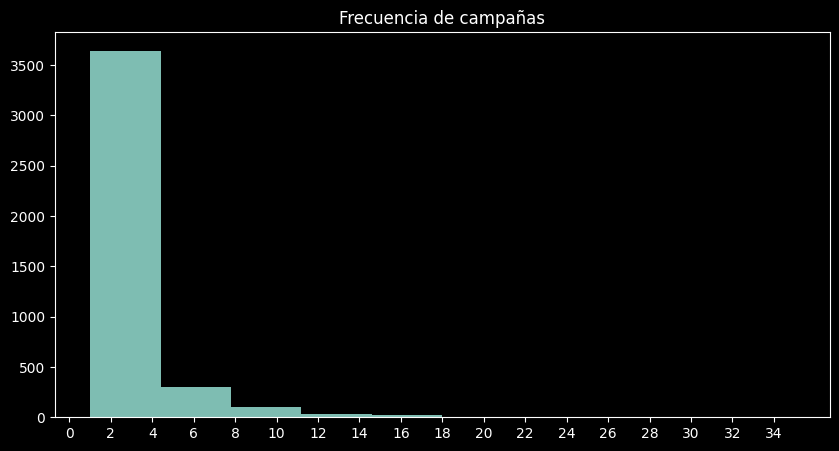

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(bank_df['campaign'], bins=10, alpha=.9)
plt.xticks(range(0,35,+2))
ax.set_title('Frecuencia de campañas');

#### Grafico de barras o BarPlot

#### Mi intención ahora es mostrar con una grafico de barras de cuales fueron las campañas más exitosas, las que tuvieron mejores resultados, para lo cual tendremos 1ro que utilziar una función de agregación sobre las campañas que obtuvieron un yes

In [14]:
# agrupamos los datos por campaña y contamos la cantidad de 'yes' en la columna 'y'
camp_yes = bank_df[bank_df['y'] == 'yes'].groupby('campaign')['y'].count()
camp_yes # agregamos la variable para imprimirla en pantalla

campaign
1     219
2     119
3      62
4      32
5       9
6       4
7       1
8       2
9       1
10      1
11      1
Name: y, dtype: int64

In [15]:
# vamos a crear las variables para los ejes X e Y
x = camp_yes.index
y = camp_yes.values

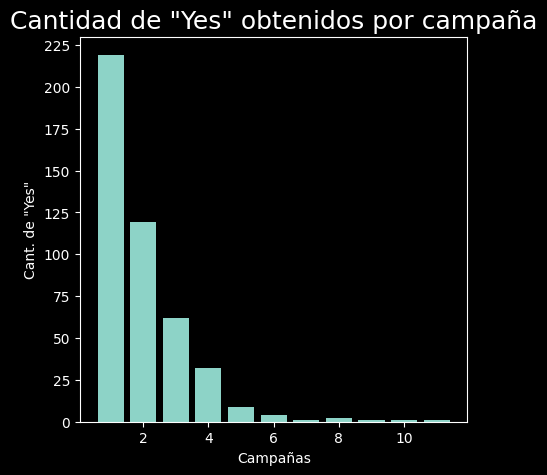

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.bar(x,y)

plt.yticks(range(0,(max(y)+25),+25)) # agregamos ticks de 25 en 25, el predeterminado salia de a 50, para tener mejor nocion de los valores
ax.set_title('Cantidad de "Yes" obtenidos por campaña', fontsize=(18))
ax.set_ylabel('Cant. de "Yes"')
ax.set_xlabel('Campañas');

### PieChart o Grafico de Tortas

#### por último vamos a graficar un pie chart (a pesar que al profe no le gustan xD) con pocas variables para que sea entendible (el gran problema de los pie charts). La intención es ver si las campañas tienen más llegada a personas en pareja o solteros/divorciados/viudos

In [6]:
marital = bank_df['marital'].unique()
marital

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [7]:
# Agrupar los datos por 'marital' y contar los 'yes'
pie_grouped = bank_df.groupby("marital")["y"].value_counts().reset_index(name="count") # agregué ese metodo de .reset_index para ver si podemos superar el error: cannot unpack non-iterable int objetct
pie_grouped

,marital,y,count
0,divorced,no,403
1,divorced,yes,43
2,married,no,2257
3,married,yes,252
4,single,no,998
5,single,yes,155
6,unknown,no,10
7,unknown,yes,1


In [8]:
# Se le pasan 2 listas al pie chart asi que las vamos a crear y con un for loop vamos a llenar estas listas
pie_values = []
pie_labels = []

In [9]:
bank_df.shape[0]

4119

In [10]:
# arrancamos el for loop
for i, row in pie_grouped.iterrows(): #TypeError: cannot unpack non-iterable int object, metimos pie_grouped en un df para y ahora nos deja iterar y llamamos .iterrows()
    if row['y'] == "yes": # me interesan los 'yes' el resto no asi que vamos con un if
        pie_media = row["count"] / bank_df.shape[0] *100 #calculamos el %% de yes para cada valor de 'marital'
        # y ahora le actualizamos los valores a las listas que usaremos para graficar
        pie_values.append(pie_media)
        pie_labels.append(row['marital'])

In [11]:
pie_values # exploramos como quedaron los datos

[1.043942704539937,
 6.117989803350328,
 3.7630492838067493,
 0.024277737314882253]

In [12]:
pie_labels # verificamos que esten bien las etiquetas

['divorced', 'married', 'single', 'unknown']

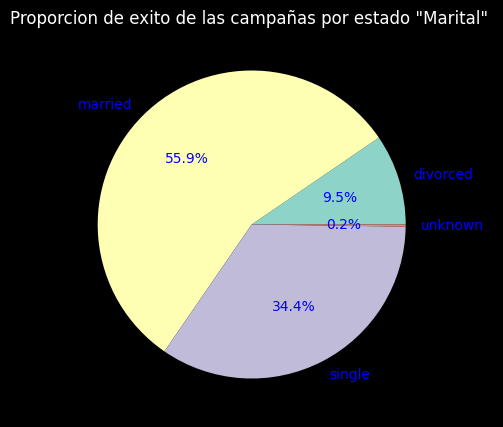

In [16]:
# graficamos
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.pie(pie_values, labels=pie_labels, autopct="%1.1f%%") #agregamos esta linea para ponerle los %% dentro del gráfico, por defecto quedan por fuera.
ax.set_title('Proporcion de exito de las campañas por estado "Marital" ')
for text in ax.texts:
  text.set_color('blue'); # cambié el color

### Seaborn

In [17]:
import seaborn as sns

ya importada la libreria, vamos a tratar de armar los graficos con seaborn ahora, algunos los repetiremos para ver las diferencias de unos y otros y en vez de hacer piechart que seaborn no tiene aprovecharemos para hacer alguno de esos bonitos como violin o un boxplot

#### Histograma

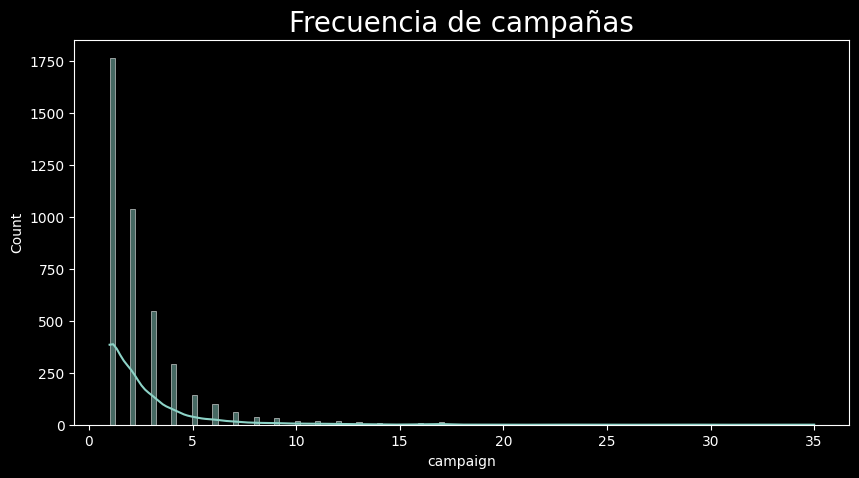

In [28]:
#copiamos los datos dle histograma que hicimos en matplotlib para tenerlos a mano pero los comentamos para no hacer lio
#fig, ax = plt.subplots(1,1, figsize=(10,5))
#ax.hist(bank_df['campaign'], bins=10, alpha=.9)
#plt.xticks(range(0,35,+2));
fig, ax = plt.subplots(1,1, figsize=(10,5)) #empezamos con el lienzo como en matplotlib

sns.histplot(data=bank_df['campaign'], kde=True)
ax.set_title('Frecuencia de campañas', fontsize=20); #a seaborn le pasamos el dataset, en este caos 1 sola columna con kde podemos agregar la curva de la disperción.

#### Grafico de Barras o BarPlor para los amigos

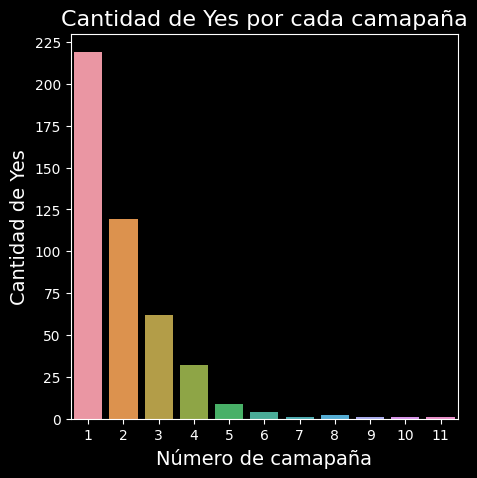

In [29]:
# vamos a copias los datos del graf de matplotlib para tenerlos a mano y armamos todo en seaborn ahora
#fig, ax = plt.subplots(1,1, figsize=(5,5))
#ax.bar(x,y)

#plt.yticks(range(0,(max(y)+25),+25)) # agregamos ticks de 25 en 25, el predeterminado salia de a 50, para tener mejor nocion de los valores
#ax.set_title('Cantidad de "Yes" obtenidos por campaña', fontsize=(18))
#ax.set_ylabel('Cant. de "Yes"')
#ax.set_xlabel('Campañas')

fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.barplot(x=x, y=y)
ax.set_ylabel('Cantidad de Yes', fontsize=(14))
ax.set_xlabel('Número de camapaña', fontsize=(14))
ax.set_title('Cantidad de Yes por cada camapaña', fontsize=(16))
plt.yticks(range(0,max(y)+25, +25)); #funcionó perfecto los cambios al plot igual que como los hicimos en matplotlib, y la verdad que da mucho mas lindo en seaborn

#### BoxPlot o gráfico de cajas
para este caso vamos a re-graficar los datos del barplot pero ahora en un grafico de cajas para comparar cual muestra la data de una forma más intuitiva

In [30]:
# voy a probar si puedo cambiar los valores "yes" de la columna 'y' del DF por valores "si" para que quede en español el grafico
prueba = bank_df['y'] # primero copiamos en una nueva variable la columna 'y' para no modificar el dataset

In [31]:
prueba.sample(10) #la imprimimos a ver si esta ok

1160     no
4111     no
756      no
1531    yes
3576     no
3833     no
200      no
1837     no
3979     no
1138     no
Name: y, dtype: object

In [32]:
# ahora con el poderoso for loop vamos a iterar entre todos los valores de la columna y cambiaremos solo los que se llamen "yes" por uno que se llame "si"
for i in range(len(prueba)): #aca seteamos la variable iteradora con i, y le pasamos el rango que sera el largo de nuestor nuevo objeto prueba, que es copia de la columna 'y' del DF
    if prueba[i] == "yes": # acá le pasamos la condicion si prueba[en el indice que marque la variable i] es igual a 'yes'
        prueba[i] = "si" # aca le decimos que hacer si lo de arriba se cumple, q seria a ese indice de prueba lo cambiaremos por 'si'

C:\Users\guill\AppData\Local\Temp\ipykernel_25864\3544811234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba[i] = "si" # aca le decimos que hacer si lo de arriba se cumple, q seria a ese indice de prueba lo cambiaremos por 'si'


In [33]:
prueba[59] # me fijo en un indice que conozco era 'yes' y ahora sale 'si! es todo un éxito

'si'

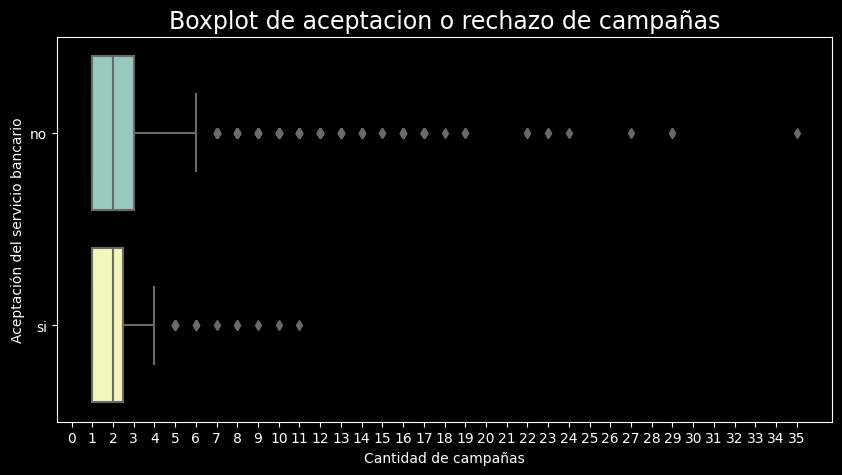

In [34]:
# nos traemos los datos que usamos para matplotlib y los comentamos para que no tomen funcionalidad
#fig, ax = plt.subplots(1,1, figsize=(5,5))
#ax.bar(x,y)

#plt.yticks(range(0,(max(y)+25),+25)) # agregamos ticks de 25 en 25, el predeterminado salia de a 50, para tener mejor nocion de los valores
#ax.set_title('Cantidad de "Yes" obtenidos por campaña', fontsize=(18))
#ax.set_ylabel('Cant. de "Yes"')
#ax.set_xlabel('Campañas');

# comenzamos a trabajar con seaborn
fig, ax = plt.subplots(1,1, figsize=(10,5)) #cambiamos el tamaño del figsize porque eran muchas campañas y quedaba todo amontonado sino
sns.boxplot(data= bank_df, x='campaign', y=prueba) #le pasamos en vez de la columna 'y' la nueva variable "prueba" para que grafique con 'si' y 'no', en vez de 'yes' y 'no'
plt.xticks(range(0, max(bank_df['campaign'])+1, +1)) # con esta linea le cambiamos los ticks del eje X para darle más visibilidad y que no se amontonen
ax.set_title('Boxplot de aceptacion o rechazo de campañas', fontsize=17) # titulos..
ax.set_xlabel('Cantidad de campañas') # labels, nada que explicar
ax.set_ylabel('Aceptación del servicio bancario');

Agregandole los xticks y agrandando el figsize a (10,5) si se empieza a apreciar la info que nos tira a la cara, vemos que hay gente que incluso desp de 35 camapñas sigue rechazando.
tmb le agregamos titulo y labels para que todo sea mas entendible y quedo pipi-cucu

Probando